In [2]:
library(Seurat)

Warning message:
“package ‘Seurat’ was built under R version 4.2.3”
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
mye = readRDS('./myeloid.rds')

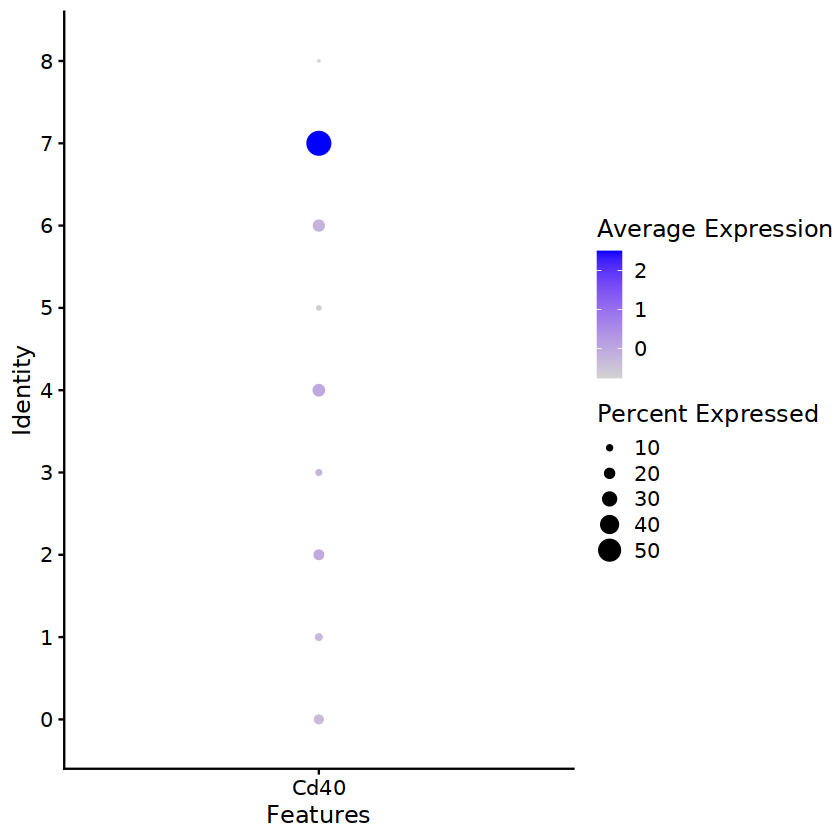

In [4]:
DotPlot(mye,features = 'Cd40')


control   MI14d    MI3d    MI7d 
    328     607    3679    2119 

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in read.table("./te.txt", header = T):
“incomplete final line found by readTableHeader on './te.txt'”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Joining with `by = join_by(gene)`
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


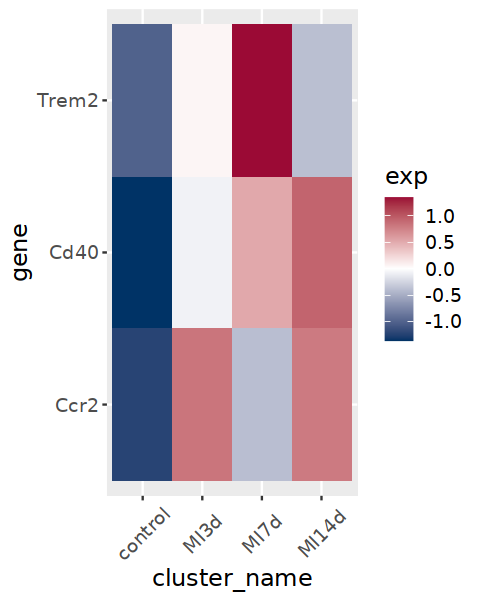

In [5]:
Idents(mye) = 'seurat_clusters'
c3 = subset(mye, idents= c(1,3,4,5,6,7,8))

table(c3$orig.ident)



#c3 = mye

library(dplyr)

gene = read.table('./te.txt',header =T)

Idents(c3) ='orig.ident'

df <- as.data.frame(AverageExpression(object = c3)$RNA)
library(tidyr)
df %>%
    filter(row.names(.) %in% gene$gene) %>% 
    apply(., 1, function(y) (y - mean(y)) / sd(y) ^ as.logical(sd(y))) %>% 
          t() -> df2
df2 %>% as.data.frame() %>% 
    tibble::rownames_to_column(var = "gene")%>%
    right_join(gene) %>%
    pivot_longer(cols = `control`:`MI7d`, names_to = "cluster_name", values_to = "exp")%>%
    group_by(gene) %>%
    mutate(exp = as.numeric(scale(exp))) %>%
    dplyr::ungroup() -> df3

cluster_name <- c("control",'MI3d','MI7d','MI14d')

library(ggplot2)
options(repr.plot.height = 5,repr.plot.width = 4)
df3 %>% ggplot(aes(x = cluster_name,
               y = gene,
               fill = exp)) +
    geom_tile() +
    scale_fill_gradient2(low="#003366", high="#990033", mid="white") +
    scale_x_discrete(limits = cluster_name) +
  theme(axis.text.x =element_text(angle =45,hjust =0.5,vjust = 0.5))+ theme(text = element_text(size = 14))

In [6]:
Idents(mye) = 'seurat_clusters'
sce.markers <- FindAllMarkers(object = mye, 
                              min.pct = 0.25, 
                              thresh.use = 0.25,only.pos =T)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



In [7]:
pathway = read.csv('BP_ego.csv',row.names = 1)

In [8]:
path1 = pathway %>%  filter(Description == 'regulation of immune effector process')
immune_effector_process =data.frame(gene = strsplit(path1[,8],split = '/'))

In [9]:
path2 = pathway %>%  filter(Description == 'leukocyte proliferation')
leukocyte_proliferation =data.frame(gene = strsplit(path2[,8],split = '/'))

In [10]:
Idents(mye)= 'seurat_clusters'

In [11]:
c3 = FindMarkers(mye, ident.1=3,only.pos = T) %>% filter(avg_log2FC > 1)

upgene_c3 = rownames(c3)

dat <- list( regulation_of_immune_effector_process = immune_effector_process$c..Arid5a....Il18rap....Il10....Ptprc....Fcgr2b....Fcgr3....Fcer1g...
            ,  leukocyte_proliferation = leukocyte_proliferation$c..Stat4....Cxcr4....Il10....Rassf5....Ptprc....Fcgr2b....Cd44...,
            upgene_of_c3 = upgene_c3)

intersect(immune_effector_process$c..Arid5a....Il18rap....Il10....Ptprc....Fcgr2b....Fcgr3....Fcer1g...
            ,  intersect(leukocyte_proliferation$c..Stat4....Cxcr4....Il10....Rassf5....Ptprc....Fcgr2b....Cd44...,
            upgene_c3))

[1] "Trem2"

In [12]:
library(ggvenn)

Loading required package: grid



In [15]:
p= ggvenn(dat,show_percentage = T,
  stroke_color = "white",
  stroke_size = 0.1,
  fill_color = c("#E41A1C","#1E90FF","#FF8C00"),
  set_name_color =c("#E41A1C","#1E90FF","#FF8C00"), 
  set_name_size = 3,text_size=6)

In [19]:
pdf('trem2_venn.pdf',width = 6,height = 6)
p
dev.off()

png 
  2

In [14]:
c7 = FindMarkers(mye, ident.1=7,only.pos = T) %>% filter(avg_log2FC > 1)
upgene_c7 = rownames(c7)

In [ ]:
dat <- list( regulation_of_immune_effector_process = immune_effector_process$c..Arid5a....Il18rap....Il10....Ptprc....Fcgr2b....Fcgr3....Fcer1g...
            ,  leukocyte_proliferation = leukocyte_proliferation$c..Stat4....Cxcr4....Il10....Rassf5....Ptprc....Fcgr2b....Cd44...,
            upgene_of_c7 = upgene_c7)
intersect(immune_effector_process$c..Arid5a....Il18rap....Il10....Ptprc....Fcgr2b....Fcgr3....Fcer1g...
            ,  intersect(leukocyte_proliferation$c..Stat4....Cxcr4....Il10....Rassf5....Ptprc....Fcgr2b....Cd44...,
            upgene_c7))

In [76]:
intersect(rownames(sce.markers %>% filter(cluster %in% c(7))),gene$gene)

[1] "Il4i1" "Cd40"  "Malt1"

In [126]:


c7 %>% filter(rownames(.) %in% c('Il4i1','Cd40','Malt1','Trem2','Ccr7'))

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Il4i1,0.00000e+00,3.266700,0.879,0.022,0.000000e+00
Ccr7,0.00000e+00,4.218611,0.869,0.034,0.000000e+00
Cd40,1.07424e-60,1.146603,0.549,0.153,3.007658e-56


c7